# Data 620 - Project 2
## Team 1  -  Jason Givens-Doyle, Mehdi Khan, Paul Britton


For project 2 we've decided to look at a data set related to global firms and their presence in 55 cities around the world.  The original data can be found [here](https://www.lboro.ac.uk/gawc/datasets/da6.html)


The first thing that we'll do is load and inspect the data


In [52]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import pandas as pd


#read the data
localPath = 'C:/Users/Paul/OneDrive - CUNY School of Professional Studies/CUNY/DATA 620/Week6/'

#drop the first row for now...
df = pd.read_csv(localPath+'da6.csv',
                 skiprows=1,
                index_col="CITIES")

#drop the last col as it appears to contain a colsum
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

df.head(10)

,KP,CL,EY,AA,PW,GR,DM,LH,SS,TH,...,DW,GJ,HH,JD,MC,SQ,WE,AO,CC,FF
CITIES,,,,,,,,,,,,,,,,,,,,,
Amsterdam,3,3,1,1,3,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
Atlanta,3,3,2,2,2,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
Bangkok,1,1,1,2,2,1,1,0,1,1,...,0,1,0,0,0,0,0,0,1,1
Barcelona,1,1,1,1,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
Beijing,1,1,1,1,2,0,1,0,1,1,...,0,1,0,0,0,0,0,1,0,1


When loading the data, we noted that the first column was a sparsely populated header row containing industry data, which we have discarded for the purposes of this work.  Otherwise, the data look good and appear to have loaded correctly.

In order to easily get the data into networkx, we'll need to convert it from "wide" format to long format:

In [53]:
#wide to long
df = df.unstack().reset_index()
df.columns = [ "Company", "City", "Weight"]

df.head(10)

,Company,City,Weight
0,KP,Amsterdam,3
1,KP,Atlanta,3
2,KP,Bangkok,1
3,KP,Barcelona,1
4,KP,Beijing,1


We've successfully converted the data such that we now how 3 columns and an index.  Each row of this data now contains 2 nodes, an implicit edge, and a "weight" attribute for that edge.

We can then use a native nx function to read the data directly from this long-format dataframe into networkX as follows:

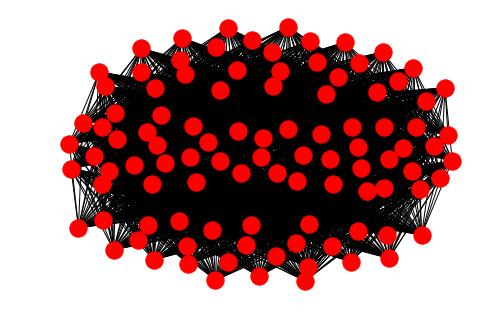

In [54]:
G=nx.convert_matrix.from_pandas_edgelist(df,source="Company",target="City",edge_attr="Weight")

nx.draw(G)
plt.show()